# nCov2019数据分析

## 数据来源

本数据来源于[2019新型冠状病毒疫情时间序列数据仓库](https://github.com/BlankerL/DXY-2019-nCoV-Data)，其数据来源为[丁香园](https://3g.dxy.cn/newh5/view/pneumonia)。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_util
import plot_util

from IPython.display import display, Markdown

In [2]:
raw_data = data_util.load_data()

## 全国数据校验

全国数据是数值较大、自然增长、概率分布、应不受人为干预的数据，所以它应该满足[本福特定律](https://baike.baidu.com/item/本福特定律)（Benford's Law, First-Digit Law），即数据首位数字越小它出现概率越高。比如首位数字是1的概率比9高很多。

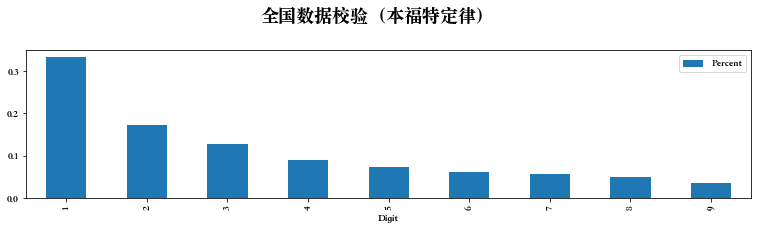

In [3]:
raw_city_confirmed = raw_data['city_confirmedCount']

benford_raw = data_util.benford(raw_city_confirmed)
figure = plot_util.plot_bar(benford_raw, '全国数据校验（本福特定律）', 'Digit', 'Percent')

In [4]:
city_name = '深圳'

In [5]:
display(Markdown('## ' + city_name + '数据'))

## 深圳数据

In [6]:
raw_data = data_util.load_data()

In [7]:
display(Markdown('### ' + city_name + '累计数量'))

### 深圳累计数量

In [8]:

city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
6763,广东省,深圳,366,0,46,0,2020-02-09 23:00:53.855,2020-02-09,0.0,12.568306
5156,广东省,深圳,369,0,56,0,2020-02-10 21:36:08.643,2020-02-10,0.0,15.176152
3201,广东省,深圳,375,0,66,0,2020-02-11 21:55:20.587,2020-02-11,0.0,17.600000
1059,广东省,深圳,386,0,82,0,2020-02-12 20:15:15.388,2020-02-12,0.0,21.243523
42,广东省,深圳,391,0,82,0,2020-02-13 10:09:04.084,2020-02-13,0.0,20.971867


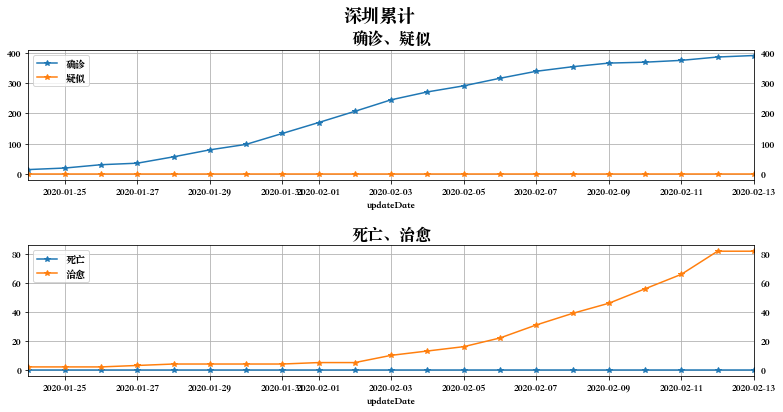

In [9]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [10]:
display(Markdown('### ' + city_name + '增长速度'))

### 深圳增长速度

In [11]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
6763,广东省,深圳,12.0,0.0,7.0,0.0,2020-02-09 23:00:53.855,2020-02-09,0.0,1.551357
5156,广东省,深圳,3.0,0.0,10.0,0.0,2020-02-10 21:36:08.643,2020-02-10,0.0,2.607846
3201,广东省,深圳,6.0,0.0,10.0,0.0,2020-02-11 21:55:20.587,2020-02-11,0.0,2.423848
1059,广东省,深圳,11.0,0.0,16.0,0.0,2020-02-12 20:15:15.388,2020-02-12,0.0,3.643523
42,广东省,深圳,5.0,0.0,0.0,0.0,2020-02-13 10:09:04.084,2020-02-13,0.0,-0.271656


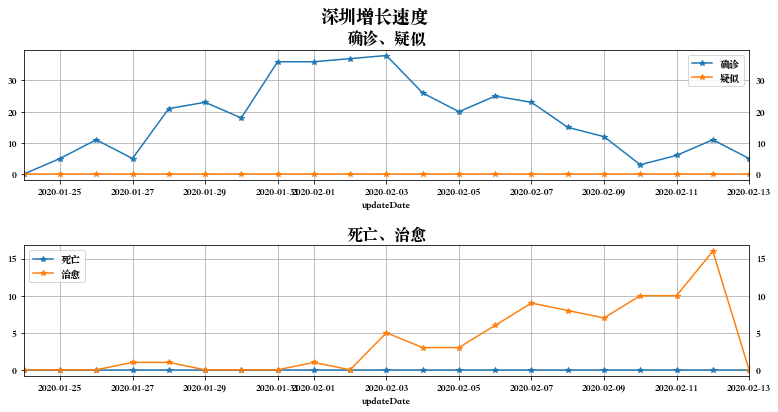

In [12]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [13]:
display(Markdown('### ' + city_name + '增长加速度'))

### 深圳增长加速度

In [14]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
6763,广东省,深圳,-3.0,0.0,-1.0,0.0,2020-02-09 23:00:53.855,2020-02-09,0.0,-0.321050
5156,广东省,深圳,-9.0,0.0,3.0,0.0,2020-02-10 21:36:08.643,2020-02-10,0.0,1.056489
3201,广东省,深圳,3.0,0.0,0.0,0.0,2020-02-11 21:55:20.587,2020-02-11,0.0,-0.183998
1059,广东省,深圳,5.0,0.0,6.0,0.0,2020-02-12 20:15:15.388,2020-02-12,0.0,1.219675
42,广东省,深圳,-6.0,0.0,-16.0,0.0,2020-02-13 10:09:04.084,2020-02-13,0.0,-3.915180


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


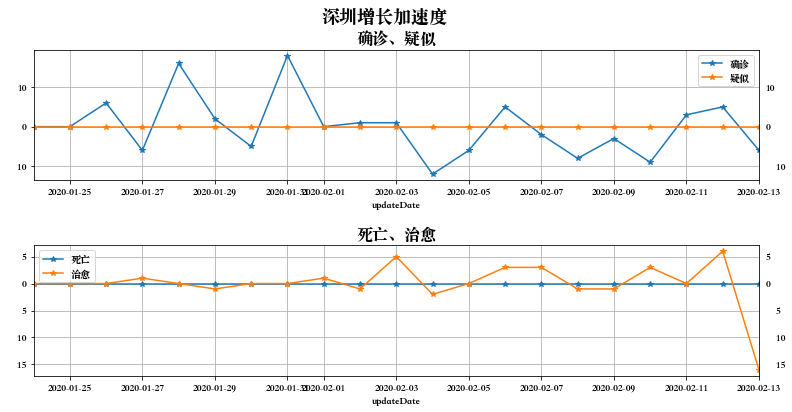

In [15]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [16]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 深圳死亡治愈率

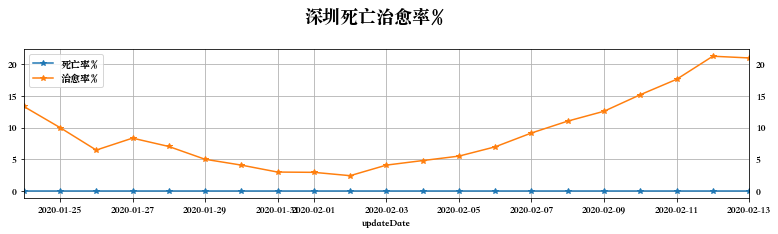

In [17]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [18]:
black_province_name = '湖北省'

In [19]:
display(Markdown('## 全国数据（除' + black_province_name + '）'))

## 全国数据（除湖北省）

In [20]:
display(Markdown('因' + black_province_name + '灾情特别严重且现已隔离（' + black_province_name + '加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。'))

因湖北省灾情特别严重且现已隔离（湖北省加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。

In [21]:
display(Markdown('## 全国累计（除' + black_province_name + '）'))

## 全国累计（除湖北省）

In [22]:
white_daily_data = data_util.aggregate_daily_except(raw_data, province_name=black_province_name)
white_daily_data = data_util.calculate_dead_cured_rate(white_daily_data)

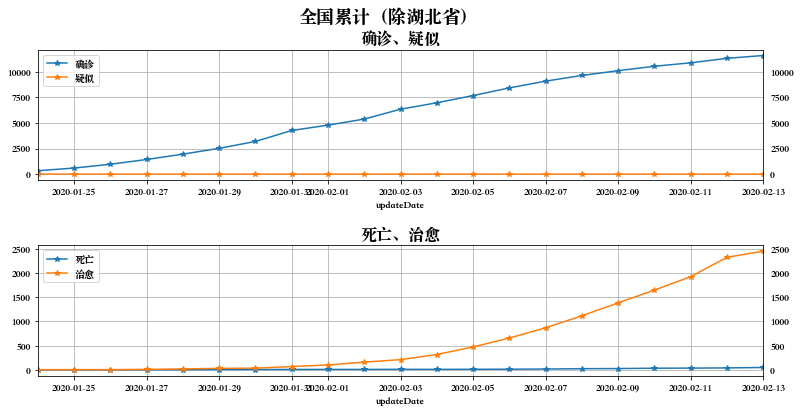

In [23]:
figure = plot_util.plot_conf_main(white_daily_data, '全国累计（除' + black_province_name + '）')

In [24]:
display(Markdown('## 全国增长速度（除' + black_province_name + '）'))

## 全国增长速度（除湖北省）

In [25]:
white_daily_data_1st_derivative = data_util.diff(white_daily_data)
white_daily_data_1st_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-09,466.0,0.0,267.0,3.0,0.017723,2.106149
2020-02-10,433.0,0.0,264.0,7.0,0.055008,1.941016
2020-02-11,337.0,0.0,277.0,2.0,0.008100,2.061066
2020-02-12,438.0,0.0,400.0,4.0,0.022179,2.848562
2020-02-13,276.0,0.0,126.0,9.0,0.068987,0.597511


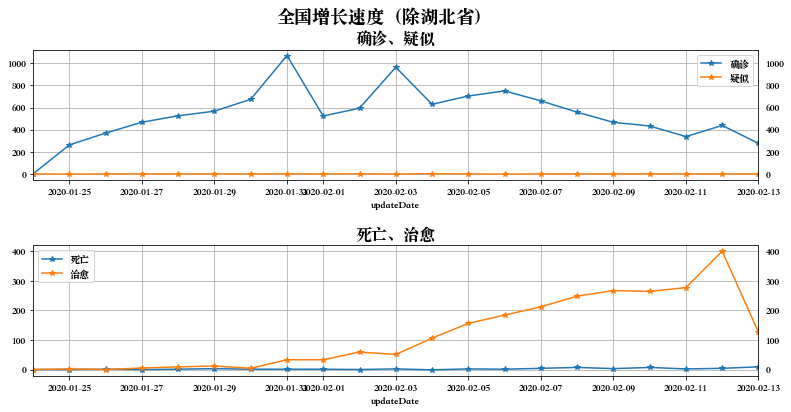

In [26]:
figure = plot_util.plot_conf_main(white_daily_data_1st_derivative, '全国增长速度（除' + black_province_name + '）')

In [27]:
display(Markdown('## 全国增长加速度（除' + black_province_name + '）'))

## 全国增长加速度（除湖北省）

In [28]:
white_daily_data_2nd_derivative = data_util.diff(white_daily_data_1st_derivative)
white_daily_data_2nd_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-09,-92.0,0.0,19.0,-4.0,-0.043383,0.089064
2020-02-10,-33.0,0.0,-3.0,4.0,0.037285,-0.165132
2020-02-11,-96.0,0.0,13.0,-5.0,-0.046908,0.120049
2020-02-12,101.0,0.0,123.0,2.0,0.014079,0.787496
2020-02-13,-162.0,0.0,-274.0,5.0,0.046808,-2.251051


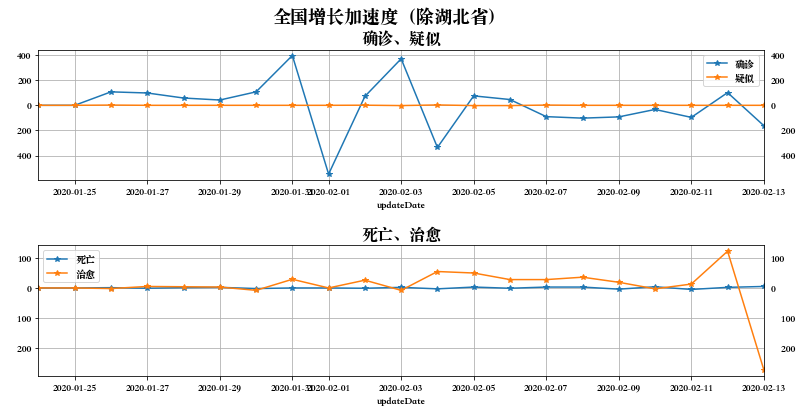

In [29]:
figure = plot_util.plot_conf_main(white_daily_data_2nd_derivative, '全国增长加速度（除' + black_province_name + '）')

In [30]:
display(Markdown('## 全国增死亡治愈率（除' + black_province_name + '）'))

## 全国增死亡治愈率（除湖北省）

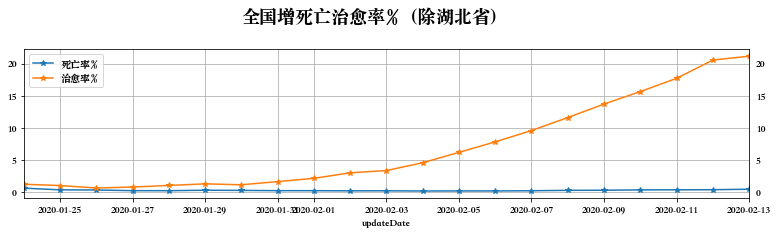

In [31]:
figure = plot_util.plot_conf_dead_cured_ratio(white_daily_data, '全国增死亡治愈率%（除' + black_province_name + '）')

In [32]:
city_name = '武汉'

In [33]:
display(Markdown('## ' + city_name + '数据'))

## 武汉数据

In [34]:
raw_data = data_util.load_data()

In [35]:
display(Markdown('### ' + city_name + '累计数量'))

### 武汉累计数量

In [36]:
city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7205,湖北省,武汉,14982,0,878,608,2020-02-09 19:09:33.896,2020-02-09,4.058203,5.860366
5177,湖北省,武汉,16902,0,1046,681,2020-02-10 21:30:02.904,2020-02-10,4.029109,6.188617
3184,湖北省,武汉,18454,0,1242,748,2020-02-11 21:55:20.587,2020-02-11,4.053322,6.730248
908,湖北省,武汉,19558,0,1380,820,2020-02-12 22:07:03.407,2020-02-12,4.192658,7.055936
353,湖北省,武汉,32994,0,1916,1036,2020-02-13 07:56:07.914,2020-02-13,3.139965,5.807116


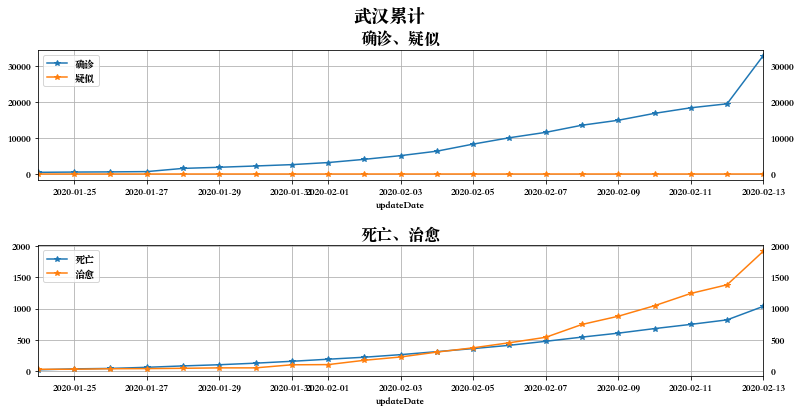

In [37]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [38]:
display(Markdown('### ' + city_name + '增长速度'))

### 武汉增长速度

In [39]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7205,湖北省,武汉,1379.0,0.0,131.0,63.0,2020-02-09 19:09:33.896,2020-02-09,0.051734,0.368930
5177,湖北省,武汉,1920.0,0.0,168.0,73.0,2020-02-10 21:30:02.904,2020-02-10,-0.029094,0.328251
3184,湖北省,武汉,1552.0,0.0,196.0,67.0,2020-02-11 21:55:20.587,2020-02-11,0.024213,0.541631
908,湖北省,武汉,1104.0,0.0,138.0,72.0,2020-02-12 22:07:03.407,2020-02-12,0.139336,0.325688
353,湖北省,武汉,13436.0,0.0,536.0,216.0,2020-02-13 07:56:07.914,2020-02-13,-1.052693,-1.248820


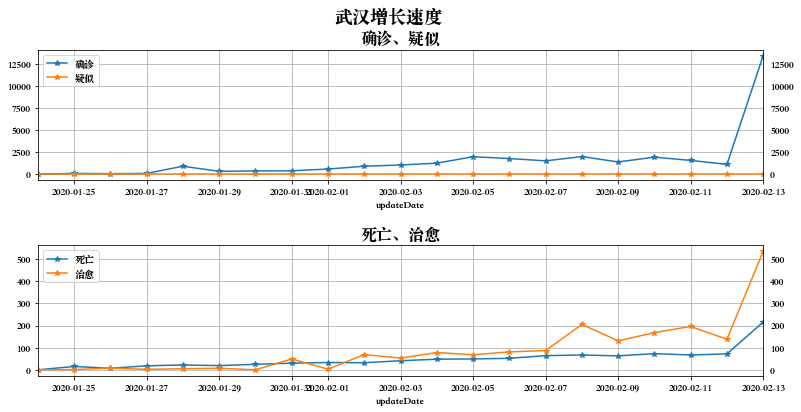

In [40]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [41]:
display(Markdown('### ' + city_name + '增长加速度'))

### 武汉增长加速度

In [42]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7205,湖北省,武汉,-606.0,0.0,-74.0,-4.0,2020-02-09 19:09:33.896,2020-02-09,0.159570,-0.457331
5177,湖北省,武汉,541.0,0.0,37.0,10.0,2020-02-10 21:30:02.904,2020-02-10,-0.080828,-0.040679
3184,湖北省,武汉,-368.0,0.0,28.0,-6.0,2020-02-11 21:55:20.587,2020-02-11,0.053307,0.213380
908,湖北省,武汉,-448.0,0.0,-58.0,5.0,2020-02-12 22:07:03.407,2020-02-12,0.115123,-0.215943
353,湖北省,武汉,12332.0,0.0,398.0,144.0,2020-02-13 07:56:07.914,2020-02-13,-1.192029,-1.574508


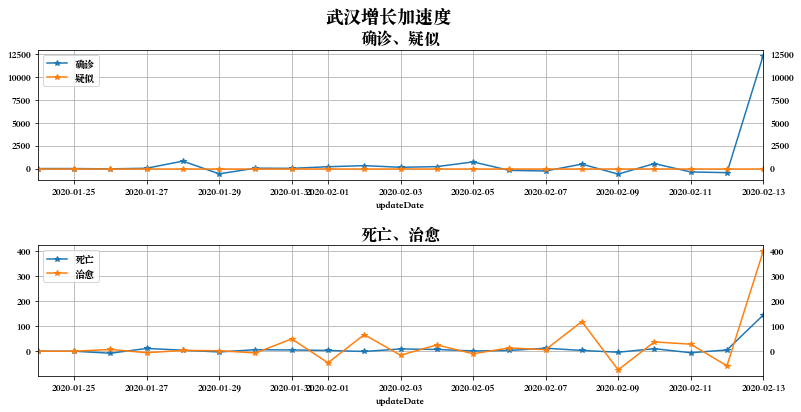

In [43]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [44]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 武汉死亡治愈率

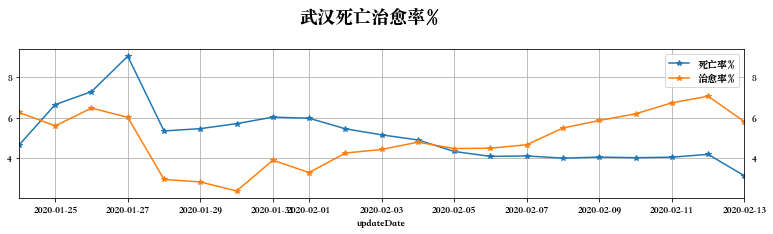

In [45]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [46]:
display(Markdown('### ' + city_name + '数据校验'))

### 武汉数据校验

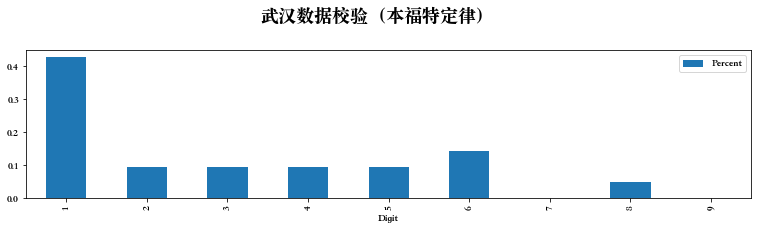

In [47]:
city_confirmed = city_daily_data['confirmed']

benford_raw = data_util.benford(city_confirmed)
figure = plot_util.plot_bar(benford_raw, city_name + '数据校验（本福特定律）', 'Digit', 'Percent')